# Stroop test data

This is code to create: Stroop test data  
Authored by and feedback to:  
MIT License  
Version: 1.0

In [4]:
# packages ----------------------------------------------------------------
library(tidyverse)
library(datapasta)
library(skimr)

## Import the data

The data from the [Stroop test](https://www.psytoolkit.org/experiment-library/experiment_stroop.html) are available below. Here is the meta data from the website.

| Colum           | Meaning                                           |
| -------------   | -------------                                     |
| `block`         | name of block                                     |
| `wrd_name`      | name of the word (e.g., "yellow")                 |
| `wrd_color`     | the color the word is printed in (e.g., "red")    |
| `color_match`   | Stroop color match (1=compatible, 0=incompatible) |
| `row`           | tablerow number                                   |
| `key_num`       | the pressed key number                            |
| `status`        | Status (1=correct, 2=wrong, 3=timeout)            |
| `resp_time_ms`  | Response time (milliseconds)                      |

The data are imported with the `datapasta` package. Highlight the table, hit `cmd/ctrl + c`, then use `datapasta::tribble_paste()` to create the `StroopData` from the html. 

In [17]:
# import ------------------------------------------------------------------
StroopDataRaw <- tibble::tribble(
  ~`block`, ~`wrd_name`, ~`wrd_color`, ~color_match, ~row, ~key_num, ~status, ~resp_time_ms,
  "training", "yellow", "red", 0, 4, 1, 1, 1441,
  "training", "red", "green", 0, 6, 2, 1, 1306,
  "training", "green", "green", 1, 10, 2, 1, 1416,
  "training", "green", "yellow", 0, 9, 4, 1, 961,
  "training", "red", "blue", 0, 7, 3, 1, 1461,
  "training", "blue", "red", 0, 16, 1, 1, 828,
  "training", "red", "yellow", 0, 5, 4, 1, 951,
  "training", "yellow", "blue", 0, 3, 3, 1, 1171,
  "training", "blue", "yellow", 0, 13, 4, 1, 824,
  "training", "yellow", "red", 0, 4, 1, 1, 829,
  "training", "blue", "green", 0, 14, 2, 1, 1023,
  "training", "yellow", "yellow", 1, 1, 4, 1, 773,
  "training", "green", "red", 0, 12, 1, 1, 961,
  "training", "green", "red", 0, 12, 1, 1, 1215,
  "training", "blue", "red", 0, 16, 1, 1, 1301,
  "training", "yellow", "red", 0, 4, 1, 1, 824,
  "training", "blue", "green", 0, 14, 2, 1, 888,
  "training", "red", "green", 0, 6, 2, 1, 940,
  "training", "yellow", "green", 0, 2, 2, 1, 651,
  "training", "red", "green", 0, 6, 2, 1, 653,
  "training", "blue", "red", 0, 16, 1, 1, 724,
  "training", "blue", "yellow", 0, 13, 4, 1, 824,
  "training", "green", "blue", 0, 11, 3, 1, 993,
  "training", "green", "green", 1, 10, 2, 1, 964,
  "training", "yellow", "blue", 0, 3, 3, 1, 1032,
  "training", "green", "blue", 0, 11, 3, 1, 786,
  "training", "green", "yellow", 0, 9, 4, 1, 799,
  "training", "green", "green", 1, 10, 2, 1, 946,
  "training", "red", "red", 1, 8, 1, 1, 715,
  "training", "green", "blue", 0, 11, 2, 2, 816,
  "training", "yellow", "yellow", 1, 1, 4, 1, 825,
  "training", "red", "yellow", 0, 5, 4, 1, 893,
  "training", "green", "yellow", 0, 9, 4, 1, 788,
  "training", "blue", "blue", 1, 15, 3, 1, 964,
  "training", "red", "yellow", 0, 5, 4, 1, 782,
  "training", "green", "blue", 0, 11, 3, 1, 1186,
  "training", "green", "blue", 0, 11, 3, 1, 1125,
  "training", "green", "red", 0, 12, 1, 1, 727,
  "training", "blue", "green", 0, 14, 2, 1, 1749,
  "training", "yellow", "blue", 0, 3, 3, 1, 854)

In [18]:
StroopDataRaw %>% dplyr::glimpse()

Observations: 40
Variables: 8
$ block        <chr> "training", "training", "training", "training", "trainin…
$ wrd_name     <chr> "yellow", "red", "green", "green", "red", "blue", "red",…
$ wrd_color    <chr> "red", "green", "green", "yellow", "blue", "red", "yello…
$ color_match  <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ row          <dbl> 4, 6, 10, 9, 7, 16, 5, 3, 13, 4, 14, 1, 12, 12, 16, 4, 1…
$ key_num      <dbl> 1, 2, 2, 4, 3, 1, 4, 3, 4, 1, 2, 4, 1, 1, 1, 1, 2, 2, 2,…
$ status       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ resp_time_ms <dbl> 1441, 1306, 1416, 961, 1461, 828, 951, 1171, 824, 829, 1…


## Wrangle 

We can wrangle these data a little to make them cleaner for the visulization. 

In [20]:
StroopData <- StroopDataRaw %>% 
        dplyr::mutate(
        color_match = 
            case_when(color_match == 1 ~ "compatible",
                      color_match == 0 ~ "incompatible"),
        status = 
            case_when(status == 1 ~ "correct",
                      status == 2 ~ "wrong",
                      status == 3 ~ "timeout"))

This looks like the data are imported and coded correctly. I've included the table below to show the crosstabs of `color_match` and `status`.

In [21]:
StroopData %>% 
    dplyr::count(color_match, status) %>% 
    tidyr::spread(status, n)

color_match,correct,wrong
<chr>,<int>,<int>
compatible,7,NA
incompatible,32,1


## Visualize

Now we can see how the distribution of response time (`resp_time_ms`) varies across the `color_match` and `status`.

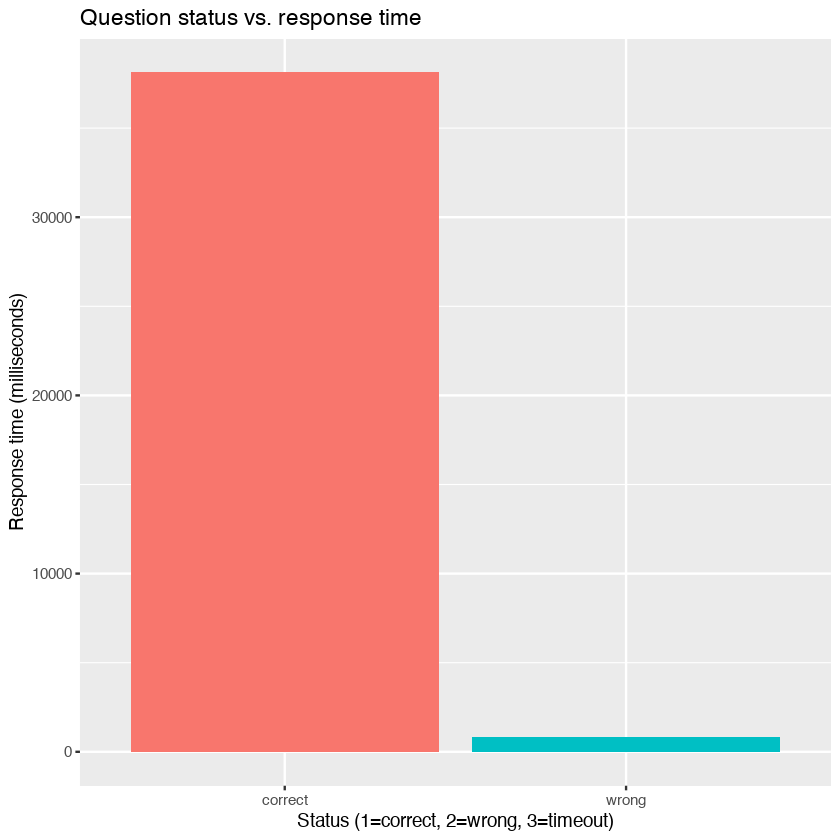

In [36]:
StroopData %>% 
    ggplot2::ggplot(aes(x = status, y = resp_time_ms, fill = status)) + 
        # remove legend from plot
        ggplot2::geom_col(show.legend = FALSE) + 
        # add labels 
        ggplot2::labs(x = "Status (1=correct, 2=wrong, 3=timeout)",
                      y = "Response time (milliseconds)",
                      title = "Question status vs. response time")

This looks like I did pretty well on the `status`--only one of the questions ended up being `wrong` (meaning the key I entered was the correct color, not necessarily the correct text). 


I am going to use the `geom_boxplot()` and `geom_violin()` to see how the response time distribution looks when compared across the two levels of `color_match` the variable for matching the color to the text (`compatible` vs. `incompatible`).

## Variation across color match

The Stroop test demonstrates "*it is difficult to name the ink color of a color word if there is a mismatch between ink color and word. For example, the word GREEN printed in red ink.* 

I can check if this is true by plotting the response time against the color match variable. If the above statement is true, the response time will be longer for `incompatible` than `compatible`.

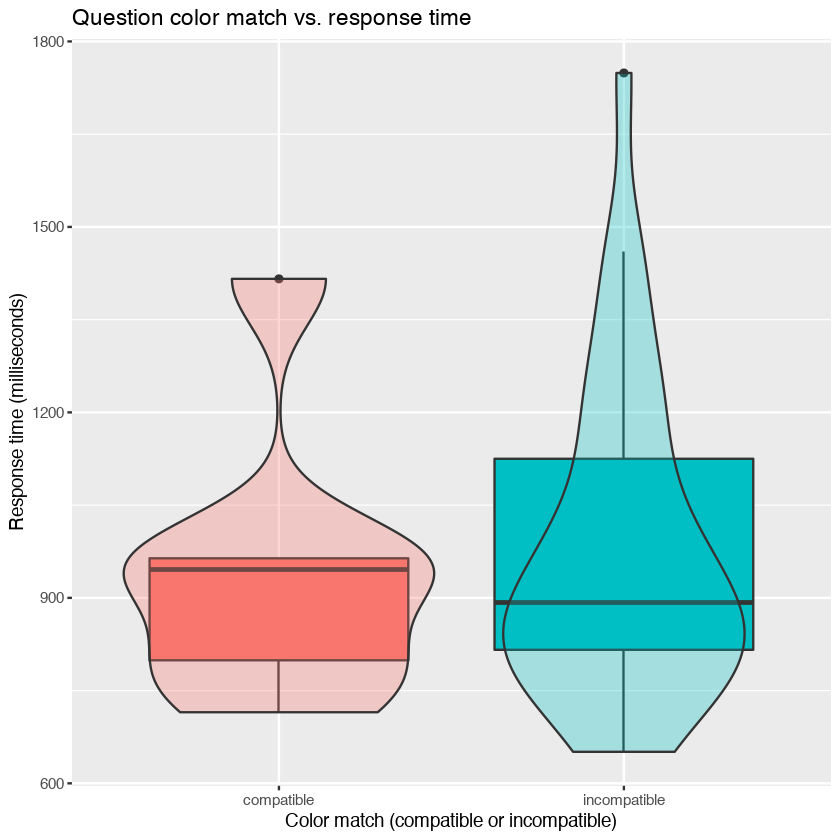

In [34]:
StroopData %>% 
    ggplot2::ggplot(aes(x = color_match, y = resp_time_ms, fill = color_match)) + 
        # remove legend from plot
        ggplot2::geom_boxplot(show.legend = FALSE) + 
        ggplot2::geom_violin(show.legend = FALSE,
                             alpha = 3/10) + 
        # add labels 
        ggplot2::labs(x = "Color match (compatible or incompatible)",
                      y = "Response time (milliseconds)",
                      title = "Question color match vs. response time")

We can see the response time was longer for `incompatible` color matches when compared to `compatible` color and text questions. 